In [1]:
import pandas as pd
# a = pd.read_csv('beer_sentence_v1.csv', index_col = 0)

In [22]:
a['tag'] = ''
taste = ['taste','t','tasting']
look = ['look','l','appearance','a','color']
smell = ['smell','s','aroma','n','nose']
feel = ['feel','f','touch','m','mouthfeel','mouth feel','mouth','mouthful','drink','swallowing']
overall = ['overall','oa','o']

In [23]:
for idx,val in enumerate(a['sentence']):
    temp = []
    for idx2 in val.split():
        if idx2 in taste:
            temp.append('taste')
        if idx2 in look:
            temp.append('look')
        if idx2 in smell:
            temp.append('smell')
        if idx2 in feel:
            temp.append('feel')
        if idx2 in overall:
            temp.append('overall')
    a['tag'][idx] = temp
    if idx% 5000 == 0:
        print(idx/len(a)*100)

0.0
0.24602219021746885
0.4920443804349377
0.7380665706524066
0.9840887608698754
1.2301109510873443
1.476133141304813
1.722155331522282
1.9681775217397508
2.2141997119572197
2.4602219021746885
2.7062440923921574
2.952266282609626
3.1982884728270955
3.444310663044564
3.6903328532620328
3.9363550434795016
4.18237723369697
4.428399423914439
4.674421614131908
4.920443804349377
5.166465994566846
5.412488184784315
5.658510375001784
5.904532565219252
6.150554755436721
6.396576945654191
6.6425991358716585
6.888621326089128
7.134643516306596
7.3806657065240655
7.626687896741534
7.872710086959003
8.118732277176473
8.36475446739394
8.61077665761141
8.856798847828879
9.102821038046347
9.348843228263815
9.594865418481286
9.840887608698754
10.086909798916222
10.332931989133693
10.578954179351161
10.82497636956863
11.070998559786098
11.317020750003568
11.563042940221035
11.809065130438505
12.055087320655975
12.301109510873442
12.54713170109091
12.793153891308382
13.039176081525849
13.285198271743317


In [25]:
a.to_csv('sent_tag.csv')

In [3]:
a = pd.read_csv('sent_tag.csv',index_col = 0)

C:\Users\dty\.conda\envs\June\lib\site-packages\numpy\lib\arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [4]:
from collections import Counter
temp_list = []
for idx, val in enumerate(a['name'].unique()):
    a1 = a[a['name']==val]
    a1 = a1.reset_index(drop=True)
    ###look
    a1['look']=''
    for idx2,val2 in enumerate(a1['tag']):
        if 'look' in val2:
            a1['look'][idx2]=1
    a1_look = a1[a1['look']==1]
    look = []
    for idx2 in a1_look['sentence']:
        look.extend(idx2.split())
    
    ### smell
    a1['smell']=''
    for idx3,val3 in enumerate(a1['tag']):
        if 'smell' in val3:
            a1['smell'][idx3]=1
    a1_smell = a1[a1['smell']==1]
    smell = []
    for idx3 in a1_smell['sentence']:
        smell.extend(idx3.split())
    
    ####taste
    a1['taste']=''
    for idx4,val4 in enumerate(a1['tag']):
        if 'taste' in val4:
            a1['taste'][idx4]=1
    a1_taste = a1[a1['taste']==1]
    taste = []
    for idx4 in a1_taste['sentence']:
        taste.extend(idx4.split())
    
    ###feel
    a1['feel']=''
    for idx5,val5 in enumerate(a1['tag']):
        if 'feel' in val5:
            a1['feel'][idx5]=1
    a1_feel = a1[a1['feel']==1]
    feel = []
    for idx5 in a1_feel['sentence']:
        feel.extend(idx5.split())
    ### 필터링_look
    text_l = dict(Counter(look).most_common())
    stopwords_l= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock','taste','t','s','smell','a',
            'color','head','appearance','finger','i','the','pours','good','like','nice','well']
    for idx6 in stopwords_l:
        try:
            text_l.pop(idx6)
        except:
            pass
    ### 필터링_smell
    text_s = dict(Counter(smell).most_common())
    stopwords_s= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock','taste','t','s','smell','a',
                 'i','aroma','the','good','like','nose','nice','well','much']
    for idx6 in stopwords_s:
        try:
            text_s.pop(idx6)
        except:
            pass
    ### 필터링_taste
    text_t = dict(Counter(taste).most_common())
    stopwords_t= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock','taste','t','s','smell','a',
            'color','head','i','j','l','the','good','like','taste','nice','booze','flavor','well']
    for idx6 in stopwords_t:
        try:
            text_t.pop(idx6)
        except:
            pass
    ### 필터링_feel
    text_f = dict(Counter(feel).most_common())
    stopwords_f= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock','appearance','color'
                  ,'a','head','like','finger','pours','i','the','feel','carbonation','body','good','like',
                  'nice','well']
    for idx6 in stopwords_f:
        try:
            text_f.pop(idx6)
        except:
            pass
        
    temp_list.append({'name':val,
                      'look':text_l,
                      'smell':text_s,
                      'taste':text_t,
                      'feel':text_f})
    if idx%20 == 0:
        print(idx)

0
20
40
60
80
100
120
140
160
180
200
220
240
260
280
300
320
340
360
380
400
420
440
460
480
500
520
540
560
580
600
620
640
660
680
700
720
740
760
780
800
820
840
860
880
900
920
940
960
980
1000
1020
1040
1060
1080
1100
1120
1140
1160
1180
1200
1220
1240
1260
1280


In [5]:
namelist = pd.DataFrame(temp_list)
# namelist.to_pickle('name_features.pkl')

In [6]:
d_feel = ['medium','smooth','full','light','thick','sticky','soft','refreshing','creamy','bodied',
         'mild']
d_look = ['hazy','cloudy','brown','dark','light','golden','clear','yellow','orange','deep','copper','tan'
         ,'pink','purple','coffee','raspberry','vanilla','gold','caramel','ruby','opaque','reddish','red'
         ,'beige','honey','tomato','plum','straw','pale','amber']
# d_smell = ['caramel','funk','cherry','toasted','vinegar','sour','ginger','orange']

In [7]:
namelist[300:350]

,feel,look,name,smell,taste
300,"{'little': 4, 'medium': 3, 'hop': 3, 'strong':...","{'dark': 7, 'amber': 6, 'medium': 4, 'white': ...",Tempus Doble Malta,"{'malt': 5, 'sweet': 4, 'malty': 4, 'note': 3,...","{'sweet': 5, 'malt': 4, 'malty': 3, 'alcohol':..."
301,"{'chocolate': 7, 'bitter': 5, 'malt': 5, 'coff...","{'black': 8, 'dark': 8, 'brown': 7, 'almost': ...",Minerva Stout,"{'chocolate': 17, 'coffee': 17, 'malt': 14, 'r...","{'coffee': 12, 'chocolate': 10, 'malt': 9, 'sw..."
302,"{'syrupy': 5, 'medium': 4, 'full': 4, 'one': 4...","{'dark': 7, 'amber': 6, 'brown': 6, 'bit': 5, ...",Cucapá Barleywine,"{'malt': 19, 'sweet': 18, 'caramel': 17, 'alco...","{'malt': 9, 'sweet': 7, 'alcohol': 6, 'barleyw..."
303,"{'bodied': 4, 'thin': 3, 'stout': 3, 'imperial...","{'black': 5, 'body': 3, 'look': 3, 'medium': 3...",Mexican Imperial Stout,"{'chocolate': 9, 'roasted': 6, 'coffee': 6, 'h...","{'chocolate': 5, 'coffee': 4, 'hint': 3, 'feel..."
304,"{'medium': 4, 'bodied': 3, 'smooth': 2, 'down'...","{'black': 2, 'complex': 1, 'roasted': 1, 'malt...",Nocturna,"{'roasted': 4, 'hop': 4, 'flavor': 3, 'coffee'...","{'lot': 2, 'bcb': 2, 'tasting': 2, 'room': 2, ..."
305,"{'bitterness': 4, 'medium': 4, 'crisp': 3, 'ho...","{'l': 4, 'amber': 4, 'copper': 3, 'orange': 3,...",La Lupulosa,"{'citrus': 7, 'hop': 5, 'ipa': 5, 'fruit': 5, ...","{'malt': 4, 'citrus': 3, 'ipa': 3, 'hop': 3, '..."
306,"{'medium': 3, 'coffee': 2, 'chocolate': 2, 'lo...","{'black': 3, 'retention': 2, 'frothy': 2, 'tan...",Insurgente / Stone - Xocoveza,"{'cinnamon': 6, 'coffee': 6, 'cocoa': 4, 'nutm...","{'coffee': 3, 'dark': 2, 'chocolate': 2, 'cinn..."
307,"{'kind': 2, 'light': 2, 'medium': 2, 'liking':...","{'amber': 2, 'orange': 2, 'lacing': 2, 'dark':...",Gwiniz Du,"{'light': 4, 'malt': 4, 'hint': 4, 'buckwheat'...","{'got': 4, 'overall': 2, 'fruit': 2, 'dark': 2..."
308,"{'medium': 29, 'bodied': 15, 'smooth': 14, 'li...","{'clear': 21, 'golden': 21, 'white': 20, 'ambe...",Saint Landelin La Divine,"{'sweet': 30, 'malt': 28, 'yeast': 23, 'bit': ...","{'malt': 19, 'sweet': 17, 'finish': 14, 'apple..."
309,"{'medium': 7, 'light': 4, 'crisp': 3, 'slightl...","{'clear': 4, 'creamy': 4, 'orange': 4, 'golden...",Grand Cru,"{'malt': 6, 'sweet': 5, 'fruit': 4, 'caramel':...","{'malt': 4, 'nutty': 3, 'sweetness': 3, 'bit':..."


In [9]:
list(namelist['feel'][0])

['medium',
 'creamy',
 'light',
 'bodied',
 'smooth',
 'full',
 'wheat',
 'finish',
 'bit',
 'banana',
 'sweet',
 'easy',
 'alcohol',
 'flavor',
 'malt',
 'clove',
 'taste',
 'high',
 'great',
 'little',
 'soft',
 'really',
 'thick',
 'fruit',
 'tongue',
 'moderate',
 'dry',
 'much',
 'spice',
 'refreshing',
 'one',
 'get',
 'could',
 'big',
 'sweetness',
 'yeast',
 'palate',
 'style',
 'nose',
 'spicy',
 'citrus',
 'amount',
 'clean',
 'make',
 'quite',
 'perfect',
 'carbonated',
 'smell',
 'crisp',
 'side',
 'f',
 'definitely',
 'bread',
 'fruity',
 'note',
 'orange',
 'it',
 'slightly',
 'balanced',
 'lemon',
 'almost',
 'hint',
 'thing',
 'abv',
 'rich',
 'aroma',
 'also',
 'drinkability',
 'aftertaste',
 'delicious',
 'bad',
 'bock',
 'brew',
 'solid',
 'bubblegum',
 'way',
 'regular',
 'time',
 'tasty',
 'mild',
 'heavy',
 't',
 'lot',
 'apple',
 'prickly',
 'would',
 'lively',
 'average',
 'though',
 'lighter',
 'bottle',
 'chewy',
 'bitterness',
 'back',
 'maybe',
 'plus',
 'li

In [10]:
df_beer = []
for idx, val in enumerate(namelist['name']):
    beer_feel = []
    beer_look = []
    for idx2 in list(namelist['feel'][idx].items()):
        if idx2[0] in d_feel:
            beer_feel.append(idx2)
    for idx2 in list(namelist['look'][idx].items()):
        if idx2[0] in d_look:
            beer_look.append(idx2)
    if len(beer_feel) >=3 and len(beer_look) >=3:
        df_beer.append({'name':val,
                       'feel':dict(beer_feel),
                       'look':dict(beer_look),
                       'smell':dict(list(namelist['smell'][idx].items())),
                       'taste':dict(list(namelist['taste'][idx].items()))})
    

In [13]:
pd.DataFrame(df_beer).to_pickle('beers_v3.pkl')

In [14]:
import pandas as pd
a = pd.read_pickle('beers_v3.pkl')
a

,feel,look,name,smell,taste
0,"{'medium': 89, 'creamy': 54, 'light': 48, 'bod...","{'hazy': 84, 'cloudy': 74, 'golden': 71, 'oran...",Ayinger Weizenbock,"{'banana': 209, 'clove': 150, 'wheat': 125, 'y...","{'banana': 130, 'wheat': 83, 'clove': 77, 'swe..."
1,"{'medium': 227, 'smooth': 124, 'creamy': 108, ...","{'brown': 331, 'dark': 230, 'light': 83, 'deep...",Prior 8,"{'fruit': 340, 'dark': 311, 'sweet': 246, 'mal...","{'fruit': 175, 'malt': 169, 'dark': 166, 'swee..."
2,"{'medium': 43, 'smooth': 35, 'full': 27, 'bodi...","{'brown': 82, 'dark': 57, 'deep': 26, 'light':...",Pannepøt - Old Monk's Ale,"{'dark': 101, 'fruit': 93, 'malt': 54, 'sweet'...","{'dark': 46, 'fruit': 45, 'caramel': 31, 'swee..."
3,"{'thick': 2, 'creamy': 2, 'medium': 2, 'refres...","{'golden': 2, 'cloudy': 2, 'gold': 2, 'copper'...",Bridge Road Pale Ale,"{'hop': 11, 'citrus': 7, 'grapefruit': 5, 'fru...","{'hop': 6, 'citrus': 5, 'grapefruit': 3, 'lemo..."
4,"{'medium': 14, 'smooth': 8, 'full': 8, 'bodied...","{'brown': 21, 'dark': 17, 'coffee': 7, 'light'...",Kasteel Winter,"{'coffee': 23, 'dark': 17, 'chocolate': 13, 'm...","{'coffee': 13, 'chocolate': 11, 'dark': 6, 'fr..."
5,"{'medium': 42, 'smooth': 38, 'light': 20, 'thi...","{'golden': 69, 'clear': 66, 'light': 31, 'ambe...",Urbock 23°,"{'sweet': 103, 'alcohol': 90, 'malt': 88, 'hon...","{'alcohol': 88, 'sweet': 72, 'malt': 45, 'bit'..."
6,"{'light': 7, 'medium': 6, 'bodied': 3, 'full':...","{'dark': 24, 'brown': 12, 'light': 9, 'clear':...",Praga Dark Lager,"{'malt': 17, 'sweet': 14, 'dark': 12, 'caramel...","{'sweet': 9, 'dark': 8, 'malt': 8, 'finish': 7..."
7,"{'medium': 4, 'light': 2, 'bodied': 1, 'creamy...","{'orange': 6, 'yellow': 5, 'clear': 2, 'hazy':...",Jopen Hoppenbier,"{'hop': 6, 'citrus': 5, 'spice': 4, 'floral': ...","{'bitter': 9, 'malt': 6, 'finish': 5, 'grapefr..."
8,"{'medium': 6, 'thick': 5, 'bodied': 4, 'creamy...","{'orange': 4, 'clear': 3, 'copper': 3, 'deep':...",Emelisse TIPA,"{'hop': 9, 'sweet': 8, 'caramel': 7, 'malt': 7...","{'hop': 6, 'malt': 6, 'bitter': 5, 'sweet': 4,..."
9,"{'light': 4, 'medium': 4, 'smooth': 2, 'bodied...","{'golden': 5, 'yellow': 3, 'hazy': 3, 'light':...",IPA Samurai,"{'hop': 6, 'saison': 5, 'sulfur': 5, 'hops': 4...","{'saison': 4, 'style': 3, 'light': 3, 'cellar'..."


### 워드 클라우드용

In [27]:
af_list = []
for idx, val in enumerate(namelist['name'].unique()):
    af1 = namelist[namelist['name']==val]
    af1 = af1.reset_index(drop=True)
    ###look
    stopwords_l= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock']
    for idx2,val2 in enumerate(af1['look']):
        text_l = val2
        for idx in stopwords_l:
            text_l.pop(idx)
    text_l
    break

TypeError: 'str' object cannot be interpreted as an integer

In [10]:
a1 = a[a['name']=='Ayinger Weizenbock']

In [18]:
# look 단어 확인
a1 = a1.reset_index(drop=True)
a1['look']=''
for idx,val in enumerate(a1['tag']):
    if 'look' in val:
        a1['look'][idx]=1

In [21]:
a1_look = a1[a1['look']==1]

In [30]:
from collections import Counter
look = []
for idx in a1_look['sentence']:
    look.extend(idx.split())

In [33]:
Counter(look).most_common()

[('color', 170),
 ('head', 138),
 ('white', 93),
 ('hazy', 84),
 ('pours', 77),
 ('cloudy', 74),
 ('golden', 71),
 ('orange', 70),
 ('a', 55),
 ('beer', 48),
 ('yellow', 48),
 ('appearance', 46),
 ('look', 42),
 ('nice', 38),
 ('light', 33),
 ('finger', 33),
 ('gold', 31),
 ('like', 29),
 ('carbonation', 27),
 ('straw', 27),
 ('banana', 25),
 ('lacing', 24),
 ('poured', 24),
 ('amber', 22),
 ('wheat', 22),
 ('weizenbock', 21),
 ('glass', 21),
 ('dark', 20),
 ('good', 19),
 ('medium', 19),
 ('pale', 19),
 ('great', 19),
 ('body', 18),
 ('bit', 18),
 ('fluffy', 16),
 ('clove', 16),
 ('pour', 16),
 ('creamy', 16),
 ('bottle', 15),
 ('retention', 14),
 ('weizen', 14),
 ('thick', 14),
 ('slightly', 14),
 ('little', 14),
 ('around', 13),
 ('flavor', 13),
 ('honey', 12),
 ('foam', 12),
 ('lot', 12),
 ('two', 12),
 ('large', 11),
 ('frothy', 11),
 ('big', 11),
 ('quickly', 11),
 ('ml', 11),
 ('huge', 11),
 ('spice', 10),
 ('solid', 10),
 ('foamy', 10),
 ('beautiful', 10),
 ('murky', 9),
 ('l',

In [34]:
#smell
a1['smell']=''
for idx,val in enumerate(a1['tag']):
    if 'smell' in val:
        a1['smell'][idx]=1
a1_smell = a1[a1['smell']==1]
smell = []
for idx in a1_smell['sentence']:
    smell.extend(idx.split())
Counter(smell).most_common()

[('banana', 209),
 ('aroma', 184),
 ('smell', 157),
 ('clove', 150),
 ('wheat', 125),
 ('nose', 116),
 ('s', 70),
 ('yeast', 67),
 ('like', 63),
 ('sweet', 59),
 ('malt', 57),
 ('taste', 55),
 ('spice', 48),
 ('beer', 46),
 ('bit', 39),
 ('fruit', 38),
 ('note', 37),
 ('nice', 36),
 ('flavor', 36),
 ('hint', 34),
 ('citrus', 33),
 ('strong', 33),
 ('bready', 32),
 ('spicy', 32),
 ('light', 31),
 ('bread', 29),
 ('well', 29),
 ('orange', 27),
 ('lot', 27),
 ('little', 27),
 ('bubblegum', 25),
 ('good', 23),
 ('sweetness', 22),
 ('yeasty', 21),
 ('apple', 21),
 ('great', 20),
 ('lemon', 20),
 ('alcohol', 19),
 ('fruity', 19),
 ('weizen', 19),
 ('quite', 19),
 ('ester', 17),
 ('fresh', 16),
 ('touch', 16),
 ('hefe', 15),
 ('also', 14),
 ('the', 14),
 ('full', 14),
 ('follows', 13),
 ('honey', 13),
 ('t', 13),
 ('pepper', 13),
 ('pear', 13),
 ('big', 13),
 ('vanilla', 13),
 ('weizenbock', 12),
 ('malty', 12),
 ('white', 12),
 ('get', 12),
 ('caramel', 12),
 ('finish', 12),
 ('really', 12),

In [35]:
#taste
a1['taste']=''
for idx,val in enumerate(a1['tag']):
    if 'taste' in val:
        a1['taste'][idx]=1
a1_taste = a1[a1['taste']==1]
taste = []
for idx in a1_taste['sentence']:
    taste.extend(idx.split())
Counter(taste).most_common()

[('taste', 255),
 ('banana', 130),
 ('wheat', 83),
 ('clove', 77),
 ('t', 71),
 ('sweet', 60),
 ('malt', 50),
 ('flavor', 47),
 ('like', 42),
 ('light', 36),
 ('spice', 31),
 ('yeast', 31),
 ('bit', 29),
 ('beer', 28),
 ('nice', 25),
 ('aroma', 24),
 ('note', 24),
 ('fruit', 23),
 ('fruity', 23),
 ('nose', 22),
 ('smell', 22),
 ('well', 21),
 ('alcohol', 20),
 ('follows', 18),
 ('bubblegum', 17),
 ('finish', 17),
 ('bready', 16),
 ('strong', 16),
 ('sweetness', 16),
 ('good', 15),
 ('orange', 15),
 ('little', 15),
 ('hint', 14),
 ('citrus', 14),
 ('weizenbock', 13),
 ('great', 13),
 ('bread', 13),
 ('spicy', 13),
 ('malty', 12),
 ('really', 12),
 ('hefe', 12),
 ('hefeweizen', 12),
 ('tasting', 12),
 ('palate', 12),
 ('yeasty', 12),
 ('smooth', 12),
 ('the', 11),
 ('front', 11),
 ('much', 11),
 ('apple', 11),
 ('balance', 10),
 ('lot', 10),
 ('hop', 10),
 ('lemon', 10),
 ('big', 10),
 ('slightly', 10),
 ('touch', 10),
 ('quite', 10),
 ('bock', 10),
 ('slight', 9),
 ('first', 9),
 ('even

In [36]:
#feel
a1['feel']=''
for idx,val in enumerate(a1['tag']):
    if 'feel' in val:
        a1['feel'][idx]=1
a1_feel = a1[a1['feel']==1]
feel = []
for idx in a1_feel['sentence']:
    feel.extend(idx.split())
Counter(feel).most_common()

[('mouthfeel', 111),
 ('medium', 89),
 ('carbonation', 84),
 ('drink', 72),
 ('touch', 65),
 ('feel', 60),
 ('m', 55),
 ('body', 54),
 ('creamy', 54),
 ('light', 48),
 ('bodied', 43),
 ('beer', 43),
 ('smooth', 42),
 ('mouth', 40),
 ('good', 34),
 ('full', 31),
 ('wheat', 30),
 ('finish', 29),
 ('bit', 27),
 ('banana', 27),
 ('sweet', 26),
 ('well', 26),
 ('nice', 25),
 ('easy', 24),
 ('like', 24),
 ('alcohol', 24),
 ('flavor', 21),
 ('malt', 21),
 ('clove', 19),
 ('taste', 19),
 ('high', 17),
 ('great', 16),
 ('little', 15),
 ('soft', 14),
 ('really', 14),
 ('thick', 13),
 ('fruit', 13),
 ('tongue', 13),
 ('moderate', 13),
 ('dry', 13),
 ('weizenbock', 12),
 ('much', 12),
 ('spice', 12),
 ('refreshing', 12),
 ('one', 12),
 ('get', 11),
 ('could', 11),
 ('big', 11),
 ('sweetness', 11),
 ('yeast', 10),
 ('palate', 10),
 ('style', 10),
 ('nose', 10),
 ('spicy', 10),
 ('the', 10),
 ('citrus', 10),
 ('amount', 10),
 ('clean', 10),
 ('make', 10),
 ('quite', 9),
 ('perfect', 9),
 ('carbonate

In [51]:
# Counter(feel).
text = dict(Counter(feel))

In [65]:
stopwords= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock']
for idx in stopwords:
    text.pop(idx)

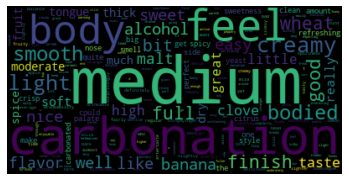

In [68]:
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate_from_frequencies(text)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [88]:
#taste
text1 = dict(Counter(taste))

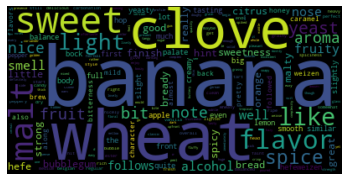

In [100]:
stopwords= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock','taste','t']
for idx in stopwords:
    try:
        text1.pop(idx)
    except:
        pass
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate_from_frequencies(text1)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [102]:
text2 = dict(Counter(smell))
text2

{'pours': 4,
 'hazy': 4,
 'light': 31,
 'amber': 3,
 'golden': 7,
 'color': 4,
 'slight': 9,
 'head': 11,
 'lacinga': 1,
 'aroma': 184,
 'wheat': 125,
 'spice': 48,
 'herbal': 3,
 'hintst': 1,
 'taste': 55,
 'follows': 13,
 'nose': 116,
 'flavorm': 1,
 'bodied': 3,
 'moderately': 1,
 'carbonated': 2,
 'beero': 1,
 'good': 23,
 'weizenbock': 12,
 'smell': 157,
 'banana': 209,
 'clove': 150,
 'bubblegum': 25,
 'ester': 17,
 'along': 11,
 'fresh': 16,
 'bread': 29,
 's': 70,
 'almost': 6,
 'never': 1,
 'pick': 5,
 'otherwise': 1,
 'sweet': 59,
 'malt': 57,
 'honey': 13,
 't': 13,
 'closely': 2,
 'raisin': 2,
 'molasses': 1,
 'allspice': 4,
 'cinnamon': 4,
 'near': 2,
 'identical': 1,
 'translation': 1,
 'watered': 1,
 'bit': 39,
 'noticeable': 2,
 'alcohol': 19,
 'bite': 2,
 'bready': 32,
 'pepper': 13,
 'pear': 13,
 'orange': 27,
 'peel': 10,
 'sweeter': 3,
 'element': 3,
 'backbone': 2,
 'note': 37,
 'doughy': 4,
 'estery': 5,
 'yeast': 67,
 'great': 20,
 'balance': 5,
 'standing': 1,
 

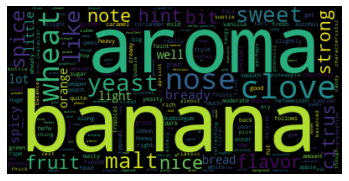

In [104]:
stopwords= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock','taste','t','s','smell']
for idx in stopwords:
    try:
        text2.pop(idx)
    except:
        pass
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate_from_frequencies(text2)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

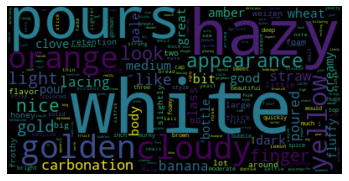

In [107]:
text3 = dict(Counter(look))
stopwords= ["mouthfeel", "drink", "touch", "m", "beer",'mouth','weizenbock','taste','t','s','smell','a',
            'color','head']
for idx in stopwords:
    try:
        text3.pop(idx)
    except:
        pass
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate_from_frequencies(text3)
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()